# Boston house data set -Machine learning 

### Liner regression for decimal value

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from scipy.stats import boxcox
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [65]:
from sklearn.datasets import load_boston

In [66]:
boston=load_boston()
#boston data set is a dictionary item
#it holds key value pair of data 

In [67]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [68]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [69]:
#boston.dtype()

In [70]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [71]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [72]:
bos=pd.DataFrame(boston.data, columns=boston.feature_names)

In [73]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [74]:
bos.shape

(506, 13)

In [75]:
bos["target"]=boston.target
#add target to the  table bos


In [76]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [77]:
bos.shape


(506, 14)

In [78]:
bos.dtypes
#check the type of data 


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [79]:
bos.isnull().sum()
#check fo  null values 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

<AxesSubplot:>

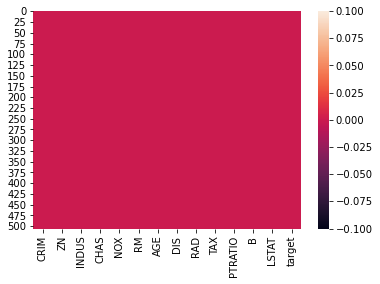

In [80]:
sns.heatmap(bos.isnull())
#null in heatmap 

In [81]:
bos.describe()
# get all statistical value 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [82]:
bos.skew()
# checks skewness .
# highe skewness value indicates  presence of outliers 


CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

<AxesSubplot:>

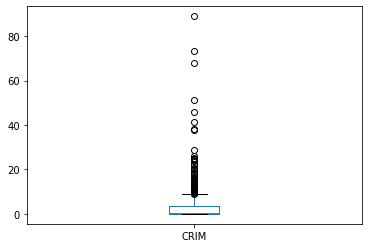

In [83]:
bos["CRIM"].plot.box()
#NOTE - Crim has highest positive skew rate 

<AxesSubplot:>

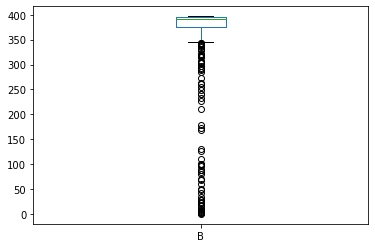

In [84]:
bos["B"].plot.box()
# B has highest negative skew rate 

<AxesSubplot:>

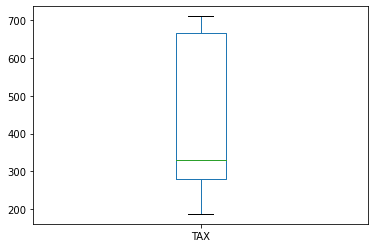

In [85]:
bos["TAX"].plot.box()
# nearby 0 skew rate 

CRIM          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
ZN         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
INDUS      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
CHAS       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
NOX        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
RM         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
AGE        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
DIS              AxesSubplot(0.125,0.125;0.0945122x0.343182)
RAD           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
TAX           AxesSubplot(0.351829,0.125;0.0945122x0.343182)
PTRATIO       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
B             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
LSTAT         AxesSubplot(0.692073,0.125;0.0945122x0.343182)
target        AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

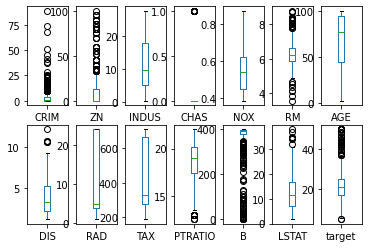

In [86]:
# to have all box plots in the same viz
bos.plot(kind="box",subplots=True,layout=(2,7))

<AxesSubplot:ylabel='Frequency'>

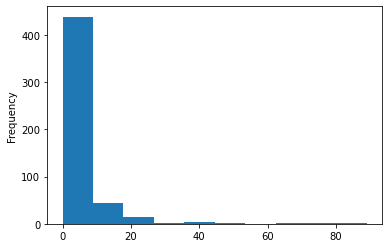

In [87]:
bos["CRIM"].plot.hist()

In [88]:
# to remove skewness 
# numpy log trasnfomation is used 
# or can apply square root tranfermation 
# or can use  scipy -box cox

In [89]:
#scipy type
from scipy.stats import boxcox
#0 >> log tranfer
#.5 >> square root transfer
bos["CRIM"]=boxcox(bos["CRIM"],0)

<AxesSubplot:ylabel='Frequency'>

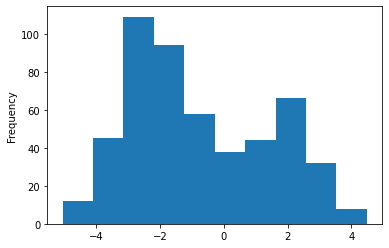

In [90]:
bos["CRIM"].plot.hist()
#skewness is removed and  pesented normally distributed datat


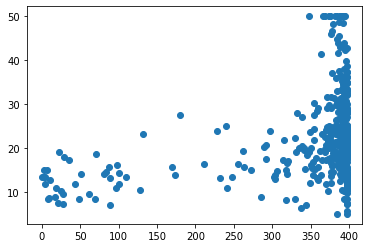

In [91]:
plt.scatter(bos["B"],bos["target"])
plt.show()

In [92]:
boscor=bos.corr()

<AxesSubplot:>

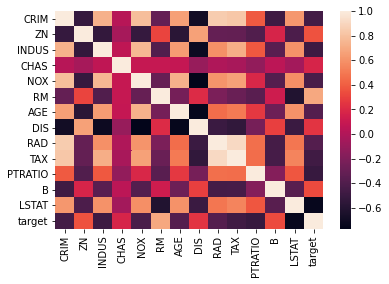

In [93]:
sns.heatmap(data=boscor)

<AxesSubplot:>

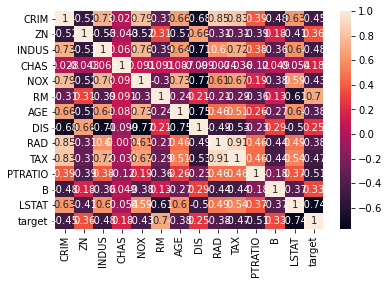

In [94]:
sns.heatmap(data=boscor , annot=True)

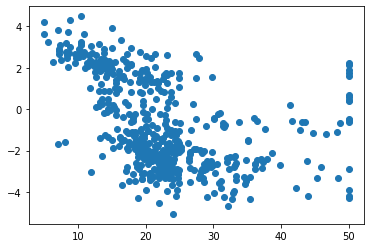

In [95]:
plt.scatter(bos["target"],bos["CRIM"])
plt.show()

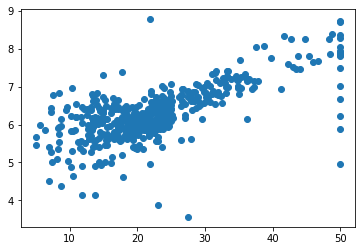

In [96]:
plt.scatter(bos["target"],bos["RM"])
plt.show()

In [97]:
#drop the  column


In [98]:
bos.drop("LSTAT", axis=1 ,inplace=True)

In [99]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2


In [100]:
from scipy.stats import zscore
z=np.abs(zscore(bos))
z

array([[1.98322812, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        0.15968566],
       [1.30563886, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.10152429],
       [1.30597804, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.32424667],
       ...,
       [0.93540227, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.14880191],
       [0.662329  , 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.0579893 ],
       [1.05026732, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        1.15724782]])

In [101]:
bos_new=bos[(z<3).all(axis=1)] # removed outliers

In [102]:
bos.shape

(506, 13)

In [103]:
bos_new.shape

(422, 13)

In [104]:
x=bos.iloc[:,0:-1]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [105]:
y=bos.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [106]:
x.shape

(506, 12)

In [107]:
y.shape

(506,)

In [108]:
# segregate data into 70-30 for train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

#previous error test_size=33 took 33 rows only 

In [109]:
x_train.shape

(339, 12)

In [110]:
x_test.shape

(167, 12)

In [111]:
y_train.shape

(339,)

In [112]:
y_test.shape

(167,)

In [113]:
# strats linear reg for ML 
lm=LinearRegression()

In [114]:
lm.fit(x_train,y_train)

LinearRegression()

In [115]:
lm.coef_

array([ 2.49719854e-01,  2.54564473e-02,  3.46031302e-02,  4.65226505e+00,
       -2.26951982e+01,  6.47509529e+00, -5.73618352e-02, -1.41609668e+00,
        6.76572073e-02, -7.15540653e-03, -1.00248197e+00,  1.69560532e-02])

In [116]:
lm.intercept_

17.597921795603174

In [117]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'target'],
      dtype='object')

In [118]:
lm.score(x_train,y_train)
# model has learned 66 percent

0.6640336806074053

In [119]:
#predict value
pred=lm.predict(x_test)
print ("predicted result is ",pred)
print("actula value is ",y_test)

predicted result is  [26.8249607  36.26420241 16.25108203 24.80763186 17.74093543 23.27804878
 19.44166354 18.68220046 20.55207934 20.28970157 27.41259731 19.90007967
  2.73261954 22.87418112 17.63053158 25.36591017 20.52696763  9.54529075
 40.85555134 17.12242183 27.25166958 29.86833798 14.42926654 23.23991334
 15.21778204 14.304949   22.52393634 13.95848879 25.21123525 18.78906248
 21.30631971 23.76370506 26.94955925 10.36136155 17.41899057 14.8763712
 29.50444917 18.40099344 27.0001022  26.02102209 16.19344933 30.0274417
 43.18676971 18.83870323 26.24264358 14.81830179 14.91207261 27.02457045
 19.5840109  27.0449288  20.70240549 33.41163845 18.35170643 24.67046152
 38.36068369 20.7565581  16.87386362 31.22022625 25.28543201 14.7303524
 23.07569086 30.5593345  29.93831437 15.38908892 19.86861511 21.06284539
 20.08097555 25.16202717 29.56647998  9.2118785  22.90598313 24.55091479
 12.43259175 14.29785769 24.15720677 14.20823225 20.23911631 42.1173575
 21.56776355 12.11150847 20.926949

In [120]:
print ("Error")

#print ("mean absolute error: " ,mean_absolute_error(y_test,pred))

#print ("mean squarwed error: " ,mean_squared_error(y_test,pred))

#print("root mean squared error:",np.sqrt(mean_squared_error (y_test ,pred)))

Error


In [121]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

#change in y is about 69 %

0.6690592387690977


 now we need to predict the value of house 
    by providing our  input for all columns 

In [122]:
t=np.array([0.02,0.12,0.002,0.1,0.2,0.05,0.15,0.1,0.1242,0.12,1,0.12])

In [123]:
t.shape

(12,)

t is a 1 d array so convert it into 2d

In [124]:
t=t.reshape(1,-1)

In [125]:
t.shape
#it became 1 row 12 col 

(1, 12)

In [126]:
lm.predict(t)

array([12.71286499])

# Regularization 